# Data Cleaning

- After the exploration step, some insights and things to be changed were obtained, like wrong dtypes, missing values, outliers values, data that can cause leakage. Now i need to cleant the dataset to fix those. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/processed/1_concat_data.csv', sep=';', encoding='utf-8')
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [3]:
# Verify duplicated data
df.duplicated().sum()

np.int64(0)

In [4]:
# Filter and rename columns
df = df[['tourney_name', 'surface', 'tourney_date', 'tourney_level', 'winner_id', 'winner_name', 'winner_hand',
        'winner_ht', 'winner_age', 'loser_id', 'loser_name','loser_hand', 'loser_ht',
        'loser_age', 'score', 'best_of']].copy()

columns_to_rename = {
    'tourney_name': 'TOURNEY_NAME',
    'surface': 'SURFACE',
    'tourney_date': 'TOURNEY_DATE',
    'tourney_level': 'TOURNEY_LEVEL',
    'winner_id': 'PLAYER_0_ID',
    'winner_name': 'PLAYER_0_NAME',
    'winner_hand': 'PLAYER_0_HAND',
    'winner_ht': 'PLAYER_0_HT',
    'winner_age': 'PLAYER_0_AGE',
    'loser_id': 'PLAYER_1_ID',
    'loser_name': 'PLAYER_1_NAME',
    'loser_hand': 'PLAYER_1_HAND',
    'loser_ht': 'PLAYER_1_HT',
    'loser_age': 'PLAYER_1_AGE',
    'score': 'SCORE',
    'best_of': 'BEST_OF'
}  

df.rename(columns=columns_to_rename, inplace=True)
df

,TOURNEY_NAME,SURFACE,TOURNEY_DATE,TOURNEY_LEVEL,PLAYER_0_ID,PLAYER_0_NAME,PLAYER_0_HAND,PLAYER_0_HT,PLAYER_0_AGE,PLAYER_1_ID,PLAYER_1_NAME,PLAYER_1_HAND,PLAYER_1_HT,PLAYER_1_AGE,SCORE,BEST_OF
0,Dublin,Grass,19680708,A,112411,Doug Smith,U,NaN,NaN,110196,Peter Ledbetter,U,NaN,24.0,6-1 7-5,3
1,Dublin,Grass,19680708,A,126914,Louis Pretorius,R,NaN,NaN,209536,Maurice Pollock,U,NaN,NaN,6-1 6-1,3
2,Dublin,Grass,19680708,A,209523,Cecil Pedlow,U,NaN,NaN,209535,John Mulvey,U,NaN,NaN,6-2 6-2,3
3,Dublin,Grass,19680708,A,100084,Tom Okker,R,178.0,24.3,209534,Unknown Fearmon,U,NaN,NaN,6-1 6-1,3
4,Dublin,Grass,19680708,A,100132,Armistead Neely,R,NaN,21.3,209533,Harry Sheridan,U,NaN,NaN,6-2 6-4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194991,Davis Cup WG2 PO: URU vs MDA,Clay,20240203,D,212051,Joaquin Aguilar Cardozo,U,NaN,18.8,209943,Ilya Snitari,R,188.0,21.8,6-1 6-0,3
194992,Davis Cup WG2 PO: VIE vs RSA,Hard,20240202,D,122533,Nam Hoang Ly,R,175.0,26.9,202475,Philip Henning,R,NaN,23.2,6-3 6-4,3
194993,Davis Cup WG2 PO: VIE vs RSA,Hard,20240202,D,144748,Kris Van Wyk,R,185.0,27.3,144775,Linh Giang Trinh,R,183.0,26.4,4-6 6-3 4-0,3
194994,Davis Cup WG2 PO: VIE vs RSA,Hard,20240202,D,122533,Nam Hoang Ly,R,175.0,26.9,144748,Kris Van Wyk,R,185.0,27.3,6-4 3-6 6-3,3


In [5]:
# Change all Davis Cup different names to 'Davis Cup'
df.loc[df['TOURNEY_NAME'].str.startswith('Davis Cup', na=False), 'TOURNEY_NAME'] = 'Davis Cup'
df

,TOURNEY_NAME,SURFACE,TOURNEY_DATE,TOURNEY_LEVEL,PLAYER_0_ID,PLAYER_0_NAME,PLAYER_0_HAND,PLAYER_0_HT,PLAYER_0_AGE,PLAYER_1_ID,PLAYER_1_NAME,PLAYER_1_HAND,PLAYER_1_HT,PLAYER_1_AGE,SCORE,BEST_OF
0,Dublin,Grass,19680708,A,112411,Doug Smith,U,NaN,NaN,110196,Peter Ledbetter,U,NaN,24.0,6-1 7-5,3
1,Dublin,Grass,19680708,A,126914,Louis Pretorius,R,NaN,NaN,209536,Maurice Pollock,U,NaN,NaN,6-1 6-1,3
2,Dublin,Grass,19680708,A,209523,Cecil Pedlow,U,NaN,NaN,209535,John Mulvey,U,NaN,NaN,6-2 6-2,3
3,Dublin,Grass,19680708,A,100084,Tom Okker,R,178.0,24.3,209534,Unknown Fearmon,U,NaN,NaN,6-1 6-1,3
4,Dublin,Grass,19680708,A,100132,Armistead Neely,R,NaN,21.3,209533,Harry Sheridan,U,NaN,NaN,6-2 6-4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194991,Davis Cup,Clay,20240203,D,212051,Joaquin Aguilar Cardozo,U,NaN,18.8,209943,Ilya Snitari,R,188.0,21.8,6-1 6-0,3
194992,Davis Cup,Hard,20240202,D,122533,Nam Hoang Ly,R,175.0,26.9,202475,Philip Henning,R,NaN,23.2,6-3 6-4,3
194993,Davis Cup,Hard,20240202,D,144748,Kris Van Wyk,R,185.0,27.3,144775,Linh Giang Trinh,R,183.0,26.4,4-6 6-3 4-0,3
194994,Davis Cup,Hard,20240202,D,122533,Nam Hoang Ly,R,175.0,26.9,144748,Kris Van Wyk,R,185.0,27.3,6-4 3-6 6-3,3


In [6]:
df.dtypes

TOURNEY_NAME      object
SURFACE           object
TOURNEY_DATE       int64
TOURNEY_LEVEL     object
PLAYER_0_ID        int64
PLAYER_0_NAME     object
PLAYER_0_HAND     object
PLAYER_0_HT      float64
PLAYER_0_AGE     float64
PLAYER_1_ID        int64
PLAYER_1_NAME     object
PLAYER_1_HAND     object
PLAYER_1_HT      float64
PLAYER_1_AGE     float64
SCORE             object
BEST_OF            int64
dtype: object

In [7]:
# Chang wrong data types
df['TOURNEY_DATE'] = pd.to_datetime(df['TOURNEY_DATE'], format='%Y%m%d')
df['TOURNEY_DATE'].dt.normalize()
df['PLAYER_0_ID'] = df['PLAYER_0_ID'].astype(str)
df['PLAYER_1_ID'] = df['PLAYER_1_ID'].astype(str)
df.head(1)

,TOURNEY_NAME,SURFACE,TOURNEY_DATE,TOURNEY_LEVEL,PLAYER_0_ID,PLAYER_0_NAME,PLAYER_0_HAND,PLAYER_0_HT,PLAYER_0_AGE,PLAYER_1_ID,PLAYER_1_NAME,PLAYER_1_HAND,PLAYER_1_HT,PLAYER_1_AGE,SCORE,BEST_OF
0,Dublin,Grass,1968-07-08,A,112411,Doug Smith,U,NaN,NaN,110196,Peter Ledbetter,U,NaN,24.0,6-1 7-5,3


In [8]:
df.dtypes

TOURNEY_NAME             object
SURFACE                  object
TOURNEY_DATE     datetime64[ns]
TOURNEY_LEVEL            object
PLAYER_0_ID              object
PLAYER_0_NAME            object
PLAYER_0_HAND            object
PLAYER_0_HT             float64
PLAYER_0_AGE            float64
PLAYER_1_ID              object
PLAYER_1_NAME            object
PLAYER_1_HAND            object
PLAYER_1_HT             float64
PLAYER_1_AGE            float64
SCORE                    object
BEST_OF                   int64
dtype: object

In [9]:
df.isna().sum()

TOURNEY_NAME         0
SURFACE           2990
TOURNEY_DATE         0
TOURNEY_LEVEL        0
PLAYER_0_ID          0
PLAYER_0_NAME        0
PLAYER_0_HAND        3
PLAYER_0_HT      16630
PLAYER_0_AGE      1309
PLAYER_1_ID          0
PLAYER_1_NAME        0
PLAYER_1_HAND       11
PLAYER_1_HT      29194
PLAYER_1_AGE      4648
SCORE                9
BEST_OF              0
dtype: int64

In [10]:
df.describe()

,TOURNEY_DATE,PLAYER_0_HT,PLAYER_0_AGE,PLAYER_1_HT,PLAYER_1_AGE,BEST_OF
count,194996,178366.000000,193687.000000,165802.000000,190348.000000,194996.000000
mean,1994-08-01 11:07:35.861658624,184.573349,25.681538,184.318808,25.737202,3.436214
min,1967-12-28 00:00:00,3.000000,14.300000,3.000000,14.200000,1.000000
25%,1980-07-14 00:00:00,180.000000,22.700000,180.000000,22.700000,3.000000
50%,1993-10-04 00:00:00,185.000000,25.300000,185.000000,25.400000,3.000000
75%,2007-12-31 00:00:00,188.000000,28.200000,188.000000,28.400000,3.000000
max,2024-12-18 00:00:00,211.000000,58.700000,211.000000,63.600000,5.000000
std,NaN,6.784395,4.059004,6.764151,4.204585,0.826817


### Surface Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df['SURFACE'].isna().sum()

np.int64(2990)

In [13]:
df[df['SURFACE'].isna()]['TOURNEY_NAME'].value_counts()

TOURNEY_NAME
Davis Cup                      1149
New York                        103
Vancouver WCT                    90
San Antonio Collegiate           89
Cannes                           88
Washington                       70
Tanglewood                       62
Seattle                          62
Quebec WCT                       59
Christchurch                     59
Calgary                          58
Cape Town                        53
Manchester                       52
Bristol                          47
Tokyo                            47
Roanoke                          37
Montana Vermala                  37
Los Angeles SoCal Chps           36
Quebec                           31
Montreal WCT                     31
Los Angeles                      31
New Delhi                        31
Djkarta                          31
Sacramento                       31
Madrid Real                      31
Perth                            31
Istanbul                         31
New Orleans WCT

Text(0.5, 1.0, 'Davis Cup Surface')

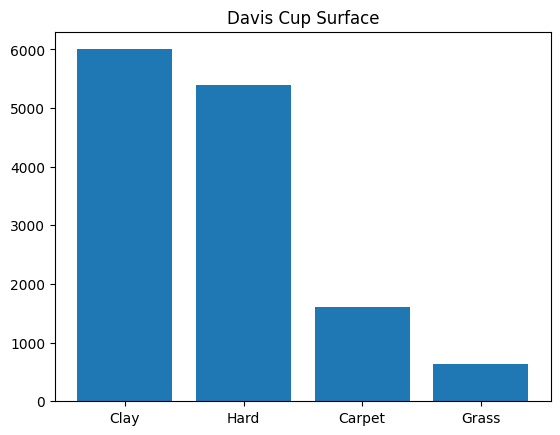

In [14]:
plt.figure()
plt.bar(df[df['TOURNEY_NAME'] == 'Davis Cup']['SURFACE'].value_counts().index,
        df[df['TOURNEY_NAME'] == 'Davis Cup']['SURFACE'].value_counts().values)
plt.title('Davis Cup Surface')

In [15]:
# Prercentage of Davis Cup matches per surface
davis_cup_matches = df[df['TOURNEY_NAME'] == 'Davis Cup']['SURFACE'].value_counts()[:2].to_dict()
sum_davis_cup_matches = sum(davis_cup_matches.values())
for surface, matches in davis_cup_matches.items():
    print(f'{surface}: {matches / sum(davis_cup_matches.values()) * 100:.2f}%')

Clay: 52.67%
Hard: 47.33%


In [16]:
# Change missing values in SURFACE to 'Hard' and 'Clay' based on their occurrence
# Clay: 52.67%
# Hard: 47.33%
mask = (df['TOURNEY_NAME'] == 'Davis Cup') & (df['SURFACE'].isnull())
n = mask.sum()

# Preenche com distribuição: 60% 'Clay', 40% 'Hard'
df.loc[mask, 'SURFACE'] = np.random.choice(['Clay', 'Hard'], size=n, p=[0.6, 0.4])


In [17]:
# Removing others rows with missing SURFACE values
df.dropna(subset=['SURFACE'], inplace=True)
df['SURFACE'].isna().sum()

np.int64(0)

### Player Hand Analysis

In [18]:
# df.loc[df['PLAYER_0_HAND'].isna()]['PLAYER_0_NAME'].value_counts()
df[df['PLAYER_1_HAND'].isna() | df['PLAYER_1_HAND'].isna()]

,TOURNEY_NAME,SURFACE,TOURNEY_DATE,TOURNEY_LEVEL,PLAYER_0_ID,PLAYER_0_NAME,PLAYER_0_HAND,PLAYER_0_HT,PLAYER_0_AGE,PLAYER_1_ID,PLAYER_1_NAME,PLAYER_1_HAND,PLAYER_1_HT,PLAYER_1_AGE,SCORE,BEST_OF
4377,Dublin,Grass,1969-07-07,A,100011,Torben Ulrich,L,180.0,40.7,207077,Desmond Early,NaN,NaN,NaN,6-0 6-2,3
4397,Dublin,Grass,1969-07-07,A,100040,Bob Hewitt,R,190.0,29.4,207073,John Mcgrath,NaN,NaN,NaN,6-3 6-3,3
6458,Kitzbuhel,Clay,1969-08-11,A,100174,Manuel Orantes,L,178.0,20.5,206972,Fritz Kolbinger,NaN,NaN,NaN,6-2 6-2,3
7559,Dublin,Grass,1970-07-06,A,100060,Marty Riessen,R,185.0,28.5,207073,John Mcgrath,NaN,NaN,NaN,6-2 6-3,3
7561,Dublin,Grass,1970-07-06,A,100029,Rod Laver,L,173.0,31.9,207077,Desmond Early,NaN,NaN,NaN,6-2 7-5,3
10400,Kingston,Hard,1970-04-06,A,100110,Terry Addison,R,180.0,24.2,206996,David Pratt,NaN,NaN,NaN,6-2 6-4,3
10615,Kitzbuehel,Clay,1970-08-09,A,100139,Gerald Battrick,R,178.0,23.2,206972,Fritz Kolbinger,NaN,NaN,NaN,6-2 6-3,3
167977,Davis Cup,Hard,2015-03-06,D,121896,Gabor Borsos,R,193.0,23.6,145023,Maxim Bulat,NaN,NaN,17.9,6-0 6-3,3
168019,Davis Cup,Hard,2015-03-06,D,106237,Chieh Fu Wang,U,NaN,21.4,145022,Nour Nehme,NaN,NaN,17.6,6-0 6-2,3
169191,Davis Cup,Hard,2015-07-17,D,105626,Takanyi Garanganga,R,NaN,24.8,145023,Maxim Bulat,NaN,NaN,18.3,6-1 6-2 6-1,5


- Theres no information about the player HAND info missing in the dataset, so i will remove theses rows

In [19]:
# Removing rows with missing PLAYER_0_HAND or PLAYER_1_HAND values
df.dropna(subset=['PLAYER_0_HAND'], inplace=True)
df.dropna(subset=['PLAYER_1_HAND'], inplace=True)
print('Player 1: ', df['PLAYER_0_HAND'].isna().sum(), '\nPlayer 2: ', df['PLAYER_1_HAND'].isna().sum())

Player 1:  0 
Player 2:  0


#### Player Height Analysis

In [20]:
df[['PLAYER_0_HT', 'PLAYER_1_HT']].describe()

,PLAYER_0_HT,PLAYER_1_HT
count,177242.000000,165033.000000
mean,184.587254,184.327983
std,6.787065,6.765482
min,3.000000,3.000000
25%,180.000000,180.000000
50%,185.000000,185.000000
75%,188.000000,188.000000
max,211.000000,211.000000


<Axes: ylabel='PLAYER_1_HT'>

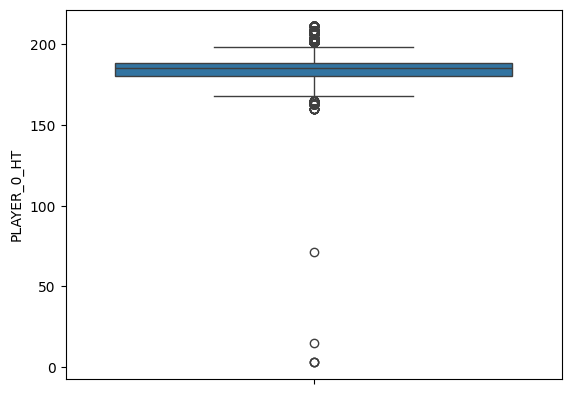

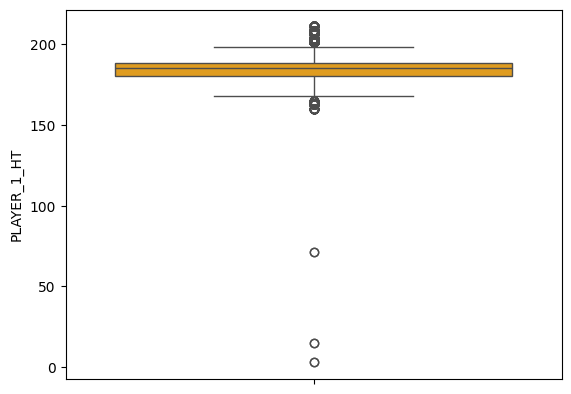

In [21]:
plt.figure()
sns.boxplot(df['PLAYER_0_HT'])
plt.figure()
sns.boxplot(df['PLAYER_1_HT'], color='orange')

In [22]:
df.sort_values(by='PLAYER_0_HT', ascending=True).head(10)

,TOURNEY_NAME,SURFACE,TOURNEY_DATE,TOURNEY_LEVEL,PLAYER_0_ID,PLAYER_0_NAME,PLAYER_0_HAND,PLAYER_0_HT,PLAYER_0_AGE,PLAYER_1_ID,PLAYER_1_NAME,PLAYER_1_HAND,PLAYER_1_HT,PLAYER_1_AGE,SCORE,BEST_OF
161818,Davis Cup,Clay,2013-02-01,D,106410,Jorge Brian Panta Herreros,R,3.0,17.5,125572,Hillel Rousseau,R,180.0,17.6,6-1 6-0,3
170958,Davis Cup,Clay,2016-03-04,D,106410,Jorge Brian Panta Herreros,R,3.0,20.6,105899,Martin Cuevas,R,191.0,24.1,5-7 7-5 6-7(5) 7-6(4) 6-4,5
176441,Davis Cup,Clay,2018-02-03,D,106410,Jorge Brian Panta Herreros,R,3.0,22.5,105479,Alejandro Mendoza,R,183.0,27.9,6-2 6-4,3
188889,Davis Cup,Hard,2022-09-17,D,134087,Johannes Ingildsen,R,15.0,25.1,211570,Cesar Cruz,U,NaN,16.0,6-4 6-4,3
191856,Davis Cup,Clay,2023-02-03,D,209907,Viacheslav Bielinskyi,R,71.0,19.1,133975,Benjamin Hassan,R,183.0,27.9,6-4 2-6 6-4,3
76947,Athens,Clay,1988-06-13,A,100620,Eduardo Osta,L,160.0,28.7,101368,Christian Miniussi,R,185.0,20.9,6-3 7-5,3
88108,Davis Cup,Hard,1991-05-10,D,101802,Ramayah Ramachandran,R,160.0,20.6,111046,Tawfik Al Ibrahim,U,NaN,14.8,6-3 6-3,3
67038,Monte Carlo,Clay,1985-04-01,A,100620,Eduardo Osta,L,160.0,25.5,107590,Luis Borfiga,R,NaN,30.4,6-2 6-4,3
95098,Davis Cup,Hard,1993-03-26,D,101802,Ramayah Ramachandran,R,160.0,22.5,111001,Emad Abou Hamdeh,U,NaN,23.3,7-6(0) 6-4 7-6(1),5
95099,Davis Cup,Hard,1993-03-26,D,101802,Ramayah Ramachandran,R,160.0,22.5,111002,Hani Al Ali,U,NaN,28.3,6-0 6-7(3) 6-4 6-3,5


In [23]:
# Fill missing height with the mean height
df['PLAYER_0_HT'] = df['PLAYER_0_HT'].fillna(df['PLAYER_0_HT'].mean().round())
df['PLAYER_1_HT'] = df['PLAYER_1_HT'].fillna(df['PLAYER_1_HT'].mean().round())

In [24]:
# Below 1.60 meter the height data starts to make no sense
df = df[df['PLAYER_0_HT'] >= 160]
df = df[df['PLAYER_1_HT'] >= 160]

<Axes: ylabel='PLAYER_1_HT'>

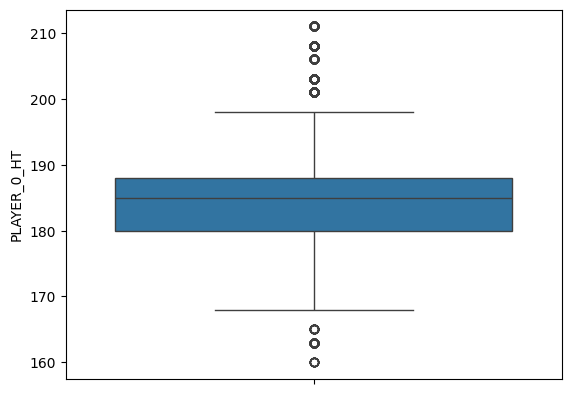

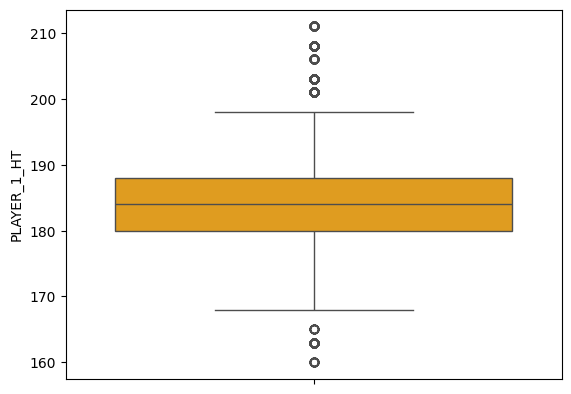

In [25]:
plt.figure()
sns.boxplot(df['PLAYER_0_HT'])
plt.figure()
sns.boxplot(df['PLAYER_1_HT'], color='orange')

### PLayer Age Analysis

In [26]:
df[['PLAYER_0_AGE', 'PLAYER_1_AGE']].isna().sum()

PLAYER_0_AGE    1175
PLAYER_1_AGE    4281
dtype: int64

In [27]:
df[['PLAYER_0_AGE', 'PLAYER_1_AGE']].mean()

PLAYER_0_AGE    25.676852
PLAYER_1_AGE    25.737034
dtype: float64

In [28]:
df[['PLAYER_0_AGE', 'PLAYER_1_AGE']].describe()

,PLAYER_0_AGE,PLAYER_1_AGE
count,191955.000000,188849.000000
mean,25.676852,25.737034
std,4.051899,4.198661
min,14.300000,14.400000
25%,22.800000,22.700000
50%,25.300000,25.400000
75%,28.200000,28.400000
max,58.700000,63.600000


<Axes: ylabel='PLAYER_1_AGE'>

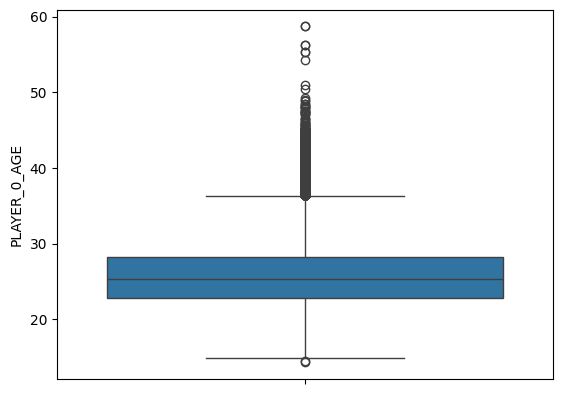

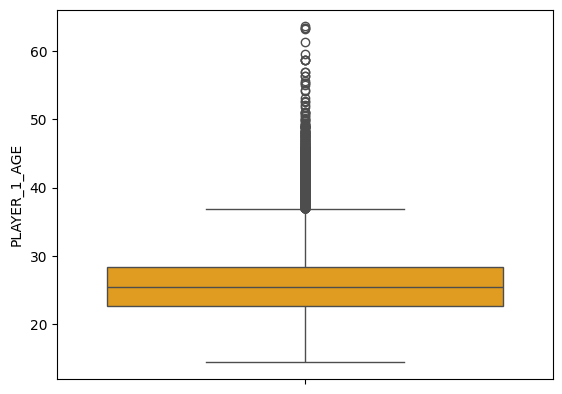

In [29]:
plt.figure()
sns.boxplot(df['PLAYER_0_AGE'])
plt.figure()
sns.boxplot(df['PLAYER_1_AGE'], color='orange')

<Axes: xlabel='PLAYER_1_AGE', ylabel='Count'>

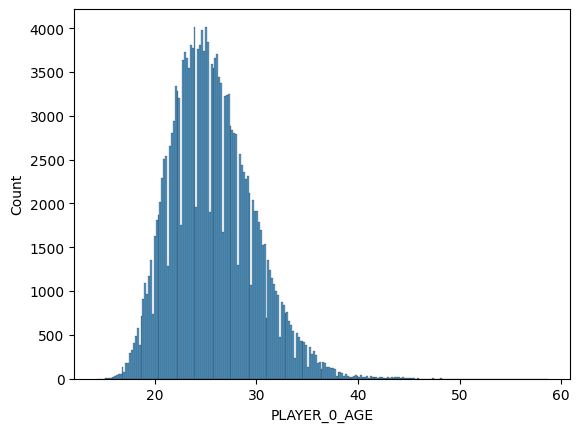

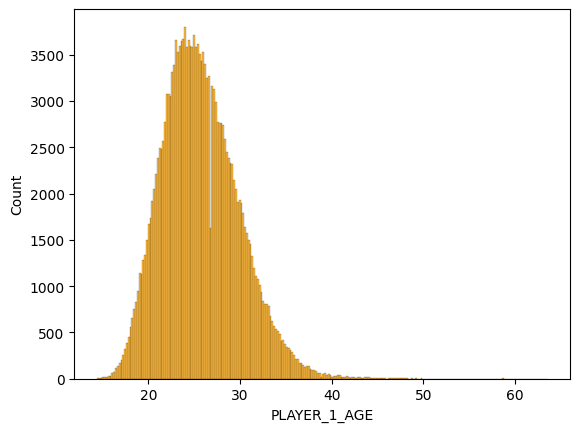

In [30]:
plt.figure()
sns.histplot(df['PLAYER_0_AGE'])
plt.figure()
sns.histplot(df['PLAYER_1_AGE'], color='orange')

- All outliers have valid information, which makes me wonder if it is worth considering the open era of tennis (1968-Current), tennis has changed a lot over the years, with some milestones separating these eras, such as the beginning of modern tennis, from the 90s onwards and the Federer-Nadal-Djokovic era

In [31]:
# Before modern era
before_modern_era = df[(df['PLAYER_1_AGE'] > 40) & (df['TOURNEY_DATE'] < pd.to_datetime('1990-01-01'))]
print(f"40 years old players befores modern era: {before_modern_era.shape[0]}")
# Modern era
modern_era = df[(df['PLAYER_1_AGE'] > 40) & (df['TOURNEY_DATE'] > pd.to_datetime('1990-01-01'))]
print(f"40 years old players in modern era: {modern_era.shape[0]}")

40 years old players befores modern era: 547
40 years old players in modern era: 59


In [32]:
# Changing all missing ages by the mean age
df['PLAYER_0_AGE'] = df['PLAYER_0_AGE'].fillna(df['PLAYER_0_AGE'].mean().round())
df['PLAYER_1_AGE'] = df['PLAYER_1_AGE'].fillna(df['PLAYER_1_AGE'].mean().round())
df.isna().sum()

TOURNEY_NAME     0
SURFACE          0
TOURNEY_DATE     0
TOURNEY_LEVEL    0
PLAYER_0_ID      0
PLAYER_0_NAME    0
PLAYER_0_HAND    0
PLAYER_0_HT      0
PLAYER_0_AGE     0
PLAYER_1_ID      0
PLAYER_1_NAME    0
PLAYER_1_HAND    0
PLAYER_1_HT      0
PLAYER_1_AGE     0
SCORE            9
BEST_OF          0
dtype: int64

### Score Analysis

In [33]:
# Listing differents types of score
df_scores = df['SCORE'].apply(lambda x : str(x).strip().split(' ')[-1] if '-' not in str(x).strip().split(' ')[-1] else '###')
print(f'Dataset Total Lines: {df.shape[0]} |  Total Scores: {df_scores.value_counts().sum()}')
print(df_scores.value_counts())

Dataset Total Lines: 193130 |  Total Scores: 193130
SCORE
###           187733
RET             3859
W/O             1239
DEF              151
UNK               90
ABD               21
nan                9
unfinished         9
abandoned          7
Walkover           5
Def.               4
Default            3
Name: count, dtype: int64


In [34]:
# Just 9 games with NaN score
df.dropna(subset=['SCORE'], inplace=True)
df.isna().sum()

# Removing wrong score values
wrong_score_values = ['RET', 'W/O', 'DEF', 'UNK', 'ABD', 'unfinished', 'abandoned', 'Walkover', 'Def.', 'Default']
for wrong_score in wrong_score_values:
    df.drop(df[df["SCORE"].str.contains(f"{wrong_score}")].index, inplace=True)

df_scores = df['SCORE'].apply(lambda x : str(x).strip().split(' ')[-1] if '-' not in str(x).strip().split(' ')[-1] else '###')
print(f'Dataset Total Lines: {df.shape[0]} |  Total Scores: {df_scores.value_counts().sum()}')
print(df_scores.value_counts())


Dataset Total Lines: 187733 |  Total Scores: 187733
SCORE
###    187733
Name: count, dtype: int64


In [35]:
df = df.drop(['TOURNEY_NAME', 'PLAYER_0_NAME', 'PLAYER_1_NAME'], axis=1)

In [36]:
df.dtypes

SURFACE                  object
TOURNEY_DATE     datetime64[ns]
TOURNEY_LEVEL            object
PLAYER_0_ID              object
PLAYER_0_HAND            object
PLAYER_0_HT             float64
PLAYER_0_AGE            float64
PLAYER_1_ID              object
PLAYER_1_HAND            object
PLAYER_1_HT             float64
PLAYER_1_AGE            float64
SCORE                    object
BEST_OF                   int64
dtype: object

In [37]:
df.to_csv('../data/processed/2_clean_data.csv', index=False, sep=';')

# Result of Data Cleaning

- All NaN values have been removed or replaced by their respective means

- All outliers, those that represent a true error, have been removed

- Ideias for splitting the dataset by 'Tennis Eras' to decrease the numbers of outliers

- ideias to reduce some error in the model training stage, such as mirror all games to have the same numbers of PLAYER_0 and PLAYER_0 wins and losses (Fixing the dataset error. All scores represent only PLAYER_0 wins, so the score feature will only have the same value)